#S A Herdev Anish
1RVU23CSE385

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


### Load and Preprocess the MNIST Dataset

First, we'll load the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits. Each image is 28x28 grayscale.

Then, we'll preprocess the data by:
1. **Reshaping**: CNNs typically expect input in the format `(batch, height, width, channels)`. For grayscale images, `channels` will be 1.
2. **Normalizing**: Scaling the pixel values from [0, 255] to [0, 1] to help the model converge faster.
3. **One-hot Encoding Labels**: Converting the integer labels (0-9) into a one-hot encoded format (e.g., 3 becomes `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]`).

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to add a channel dimension (for grayscale, channel is 1)
# Images are 28x28 pixels. So, the input shape for CNN will be (28, 28, 1).
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values to the range [0, 1]
x_train /= 255
x_test /= 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


### Build the CNN Architecture

Now, let's define a simple CNN architecture. This model will consist of:

*   **Convolutional Layers (Conv2D)**: These layers apply filters to the input image to extract features.
*   **Pooling Layers (MaxPooling2D)**: These layers reduce the spatial dimensions of the feature maps, reducing computational cost and helping to control overfitting.
*   **Flatten Layer**: This layer converts the 2D feature maps into a 1D vector to feed into the dense layers.
*   **Dense (Fully Connected) Layers**: These layers perform classification based on the extracted features.
*   **Dropout Layer**: Used for regularization to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training.
*   **Output Layer**: A Dense layer with 10 units (for 10 classes) and a `softmax` activation function to output class probabilities.

In [3]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Display the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

Before training, the model needs to be compiled. This involves specifying:

*   **Optimizer**: The algorithm used to update network weights (e.g., `adam`).
*   **Loss Function**: A measure of how well the model is performing (e.g., `categorical_crossentropy` for multi-class classification with one-hot encoded labels).
*   **Metrics**: Used to monitor the training and testing steps (e.g., `accuracy`).

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully!")

Model compiled successfully!


### Train the Model

Now, let's train the CNN model using the `x_train` and `y_train` data. We'll specify:

*   **Epochs**: The number of times the model will iterate over the entire training dataset.
*   **Batch Size**: The number of samples per gradient update.
*   **Validation Data**: Data on which to evaluate the loss and any model metrics at the end of each epoch.

In [5]:
# Train the model
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

print("Model training complete!")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 98ms/step - accuracy: 0.8052 - loss: 0.6089 - val_accuracy: 0.9810 - val_loss: 0.0602
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 93ms/step - accuracy: 0.9706 - loss: 0.0995 - val_accuracy: 0.9868 - val_loss: 0.0407
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 94ms/step - accuracy: 0.9791 - loss: 0.0683 - val_accuracy: 0.9870 - val_loss: 0.0381
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9833 - loss: 0.0558 - val_accuracy: 0.9884 - val_loss: 0.0326
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.9853 - loss: 0.0493 - val_accuracy: 0.9906 - val_loss: 0.0274
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step - accuracy: 0.9878 - loss: 0.0418 - val_accuracy: 0.9905 - val_loss: 0.0273
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.9896 - val_loss: 0.0323
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9895 - loss: 0.0315 - 

### Evaluate the Model

After training, it's crucial to evaluate the model's performance on unseen test data to ensure it generalizes well.

In [6]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0290
Test Accuracy: 0.9910


In [7]:
# Saving the model on disk
model.save("cnn_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


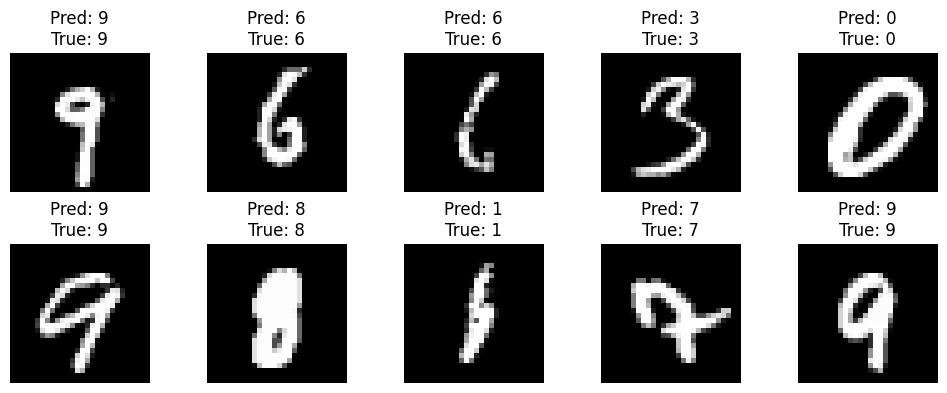

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Select 5 random indices
indices = np.random.choice(len(x_test), 10, replace=False)

# Extract images and labels
random_images = x_test[indices]
random_labels = y_test[indices]

predictions = model.predict(random_images)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot
true_classes = np.argmax(random_labels, axis=1)

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()